In [1]:
import pandas as pd
import numpy as np

import pymc as pm

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
click_df = pd.read_csv("Data_ver2.csv")

click_df.head(100)

click_df['avgTime'].dropna(inplace=True)

In [3]:
# Create the features and response
X = click_df.loc[:, ['tab_nopic_clicks', 'list_nopic_clicks','paragraph_nopic_clicks','tab_pic_clicks','list_pic_clicks','paragraph_pic_clicks']]
y = click_df.loc[:, 'avgTime']

In [4]:
with pm.Model() as linear_model2:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sigma = 10)

    # Slope
    slopetab_nopic_clicks = pm.Normal('slopetab_nopic_clicks', mu = 0, sigma = 10)
    slopelist_nopic_clicks = pm.Normal('slopelist_nopic_clicks', mu = 0, sigma = 10)
    slopeparagraph_nopic_clicks = pm.Normal('slopeparagraph_nopic_clicks', mu = 0, sigma = 10)
    slopetab_pic_clicks = pm.Normal('slopetab_pic_clicks', mu = 0, sigma = 10)
    slopelist_pic_clicks = pm.Normal('slopelist_pic_clicks', mu = 0, sigma = 10)
    slopeparagraph_pic_clicks = pm.Normal('slopeparagraph_pic_clicks', mu = 0, sigma = 10)

    # Standard deviation
    sigma = pm.HalfNormal('sigma', sigma = 10)

    # Estimate of mean
    mean = intercept + slopetab_nopic_clicks * X.loc[:, 'tab_nopic_clicks'] + slopelist_nopic_clicks * X.loc[:, 'list_nopic_clicks'] + slopeparagraph_nopic_clicks * X.loc[:, 'paragraph_nopic_clicks'] + slopetab_pic_clicks * X.loc[:, 'tab_pic_clicks'] + slopelist_pic_clicks * X.loc[:, 'list_pic_clicks'] + slopeparagraph_pic_clicks * X.loc[:, 'paragraph_pic_clicks']

    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sigma = sigma, observed = y.values)

    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(draws=1000, step=step)

d:\Documents\GitHub\HCI-Data-Analysis\.venv\Lib\site-packages\pymc\model\core.py:1317: ImputationWarning: Data in Y_obs contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, slopetab_nopic_clicks, slopelist_nopic_clicks, slopeparagraph_nopic_clicks, slopetab_pic_clicks, slopelist_pic_clicks, slopeparagraph_pic_clicks, sigma, Y_obs_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 921 seconds.


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'slopetab_nopic_clicks'}>,
        <Axes: title={'center': 'slopelist_nopic_clicks'}>,
        <Axes: title={'center': 'slopeparagraph_nopic_clicks'}>],
       [<Axes: title={'center': 'slopetab_pic_clicks'}>,
        <Axes: title={'center': 'slopelist_pic_clicks'}>,
        <Axes: title={'center': 'slopeparagraph_pic_clicks'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

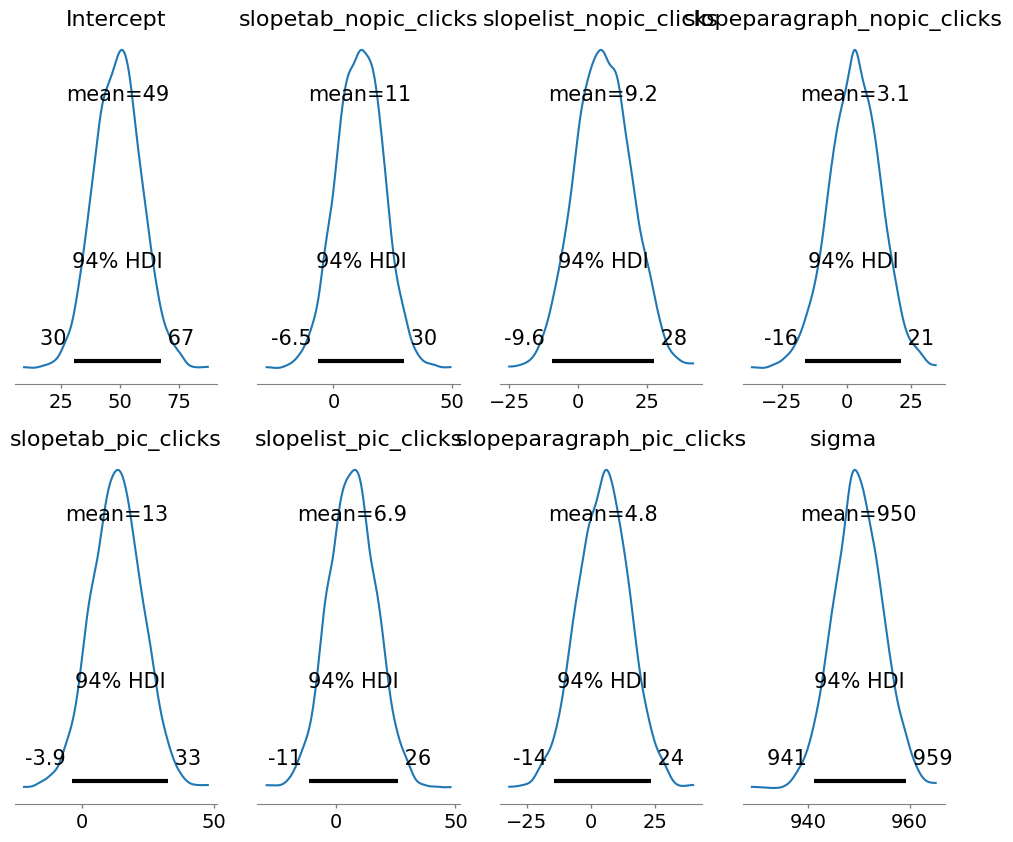

In [5]:
variables_to_plot = ['Intercept', 'slopetab_nopic_clicks', 'slopelist_nopic_clicks',
                     'slopeparagraph_nopic_clicks', 'slopetab_pic_clicks',
                     'slopelist_pic_clicks', 'slopeparagraph_pic_clicks', 'sigma']

pm.plot_posterior(linear_trace, var_names=variables_to_plot, figsize=(12, 10))

In [ ]:
# y = 49 + + xi * 11 + xi * 9.2 + xi * 3.1 + xi * 13 + xi * 6.9 + xi * 4.8

In [6]:
import itertools

In [8]:
digits = [0, 1]
coefficients = [11, 9.2, 3.1, 13, 6.9, 4.8]
combinations = list(itertools.product(digits, repeat=6))

In [9]:
combinations

[(0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 1, 1),
 (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 1, 0, 1),
 (0, 0, 0, 1, 1, 0),
 (0, 0, 0, 1, 1, 1),
 (0, 0, 1, 0, 0, 0),
 (0, 0, 1, 0, 0, 1),
 (0, 0, 1, 0, 1, 0),
 (0, 0, 1, 0, 1, 1),
 (0, 0, 1, 1, 0, 0),
 (0, 0, 1, 1, 0, 1),
 (0, 0, 1, 1, 1, 0),
 (0, 0, 1, 1, 1, 1),
 (0, 1, 0, 0, 0, 0),
 (0, 1, 0, 0, 0, 1),
 (0, 1, 0, 0, 1, 0),
 (0, 1, 0, 0, 1, 1),
 (0, 1, 0, 1, 0, 0),
 (0, 1, 0, 1, 0, 1),
 (0, 1, 0, 1, 1, 0),
 (0, 1, 0, 1, 1, 1),
 (0, 1, 1, 0, 0, 0),
 (0, 1, 1, 0, 0, 1),
 (0, 1, 1, 0, 1, 0),
 (0, 1, 1, 0, 1, 1),
 (0, 1, 1, 1, 0, 0),
 (0, 1, 1, 1, 0, 1),
 (0, 1, 1, 1, 1, 0),
 (0, 1, 1, 1, 1, 1),
 (1, 0, 0, 0, 0, 0),
 (1, 0, 0, 0, 0, 1),
 (1, 0, 0, 0, 1, 0),
 (1, 0, 0, 0, 1, 1),
 (1, 0, 0, 1, 0, 0),
 (1, 0, 0, 1, 0, 1),
 (1, 0, 0, 1, 1, 0),
 (1, 0, 0, 1, 1, 1),
 (1, 0, 1, 0, 0, 0),
 (1, 0, 1, 0, 0, 1),
 (1, 0, 1, 0, 1, 0),
 (1, 0, 1, 0, 1, 1),
 (1, 0, 1, 1, 0, 0),
 (1, 0, 1, 1, 0, 1),
 (1, 0, 1, 1, 1, 0),
 (1, 0, 1, 1,

In [10]:
def calculate_y(combination):
    y = 49
    for digit, coeff in zip(combination, coefficients):
        y += int(digit) * coeff
    return y

In [11]:
y_values = [calculate_y(combination) for combination in combinations]

In [12]:
y_values

[49.0,
 53.8,
 55.9,
 60.699999999999996,
 62.0,
 66.8,
 68.9,
 73.7,
 52.1,
 56.9,
 59.0,
 63.8,
 65.1,
 69.89999999999999,
 72.0,
 76.8,
 58.2,
 63.0,
 65.10000000000001,
 69.9,
 71.2,
 76.0,
 78.10000000000001,
 82.9,
 61.300000000000004,
 66.10000000000001,
 68.2,
 73.0,
 74.30000000000001,
 79.10000000000001,
 81.20000000000002,
 86.00000000000001,
 60.0,
 64.8,
 66.9,
 71.7,
 73.0,
 77.8,
 79.9,
 84.7,
 63.1,
 67.9,
 70.0,
 74.8,
 76.1,
 80.89999999999999,
 83.0,
 87.8,
 69.2,
 74.0,
 76.10000000000001,
 80.9,
 82.2,
 87.0,
 89.10000000000001,
 93.9,
 72.3,
 77.1,
 79.2,
 84.0,
 85.3,
 90.1,
 92.2,
 97.0]

In [13]:
variables = ['slopetab_nopic_clicks', 'slopelist_nopic_clicks', 'slopeparagraph_nopic_clicks', 
             'slopetab_pic_clicks', 'slopelist_pic_clicks', 'slopeparagraph_pic_clicks']

In [14]:
values_df = pd.DataFrame(combinations, columns=variables)
values_df['Concatenated_Variables'] = values_df.apply(lambda row: ''.join(row.astype(str)), axis=1)
values_df['y_values'] = y_values

In [15]:
values_df

,slopetab_nopic_clicks,slopelist_nopic_clicks,slopeparagraph_nopic_clicks,slopetab_pic_clicks,slopelist_pic_clicks,slopeparagraph_pic_clicks,Concatenated_Variables,y_values
0,0,0,0,0,0,0,000000,49.0
1,0,0,0,0,0,1,000001,53.8
2,0,0,0,0,1,0,000010,55.9
3,0,0,0,0,1,1,000011,60.7
4,0,0,0,1,0,0,000100,62.0
...,...,...,...,...,...,...,...,...
59,1,1,1,0,1,1,111011,84.0
60,1,1,1,1,0,0,111100,85.3
61,1,1,1,1,0,1,111101,90.1
62,1,1,1,1,1,0,111110,92.2


In [16]:
import matplotlib.pyplot as plt

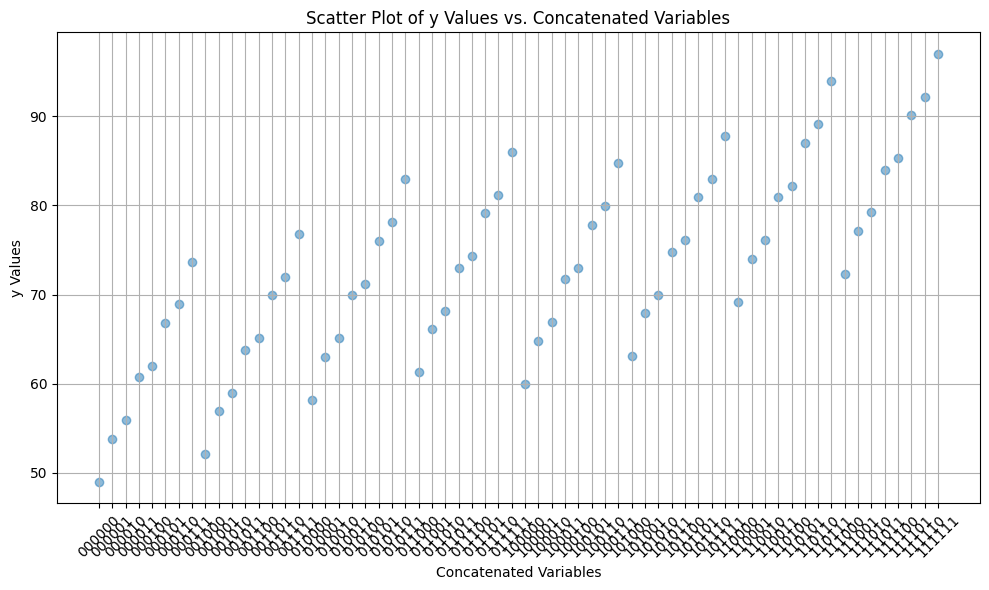

In [17]:
# Scatter plot of y values vs. concatenated variables
plt.figure(figsize=(10, 6))
plt.scatter(values_df['Concatenated_Variables'], values_df['y_values'], alpha=0.5)
plt.xlabel('Concatenated Variables')
plt.ylabel('y Values')
plt.title('Scatter Plot of y Values vs. Concatenated Variables')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


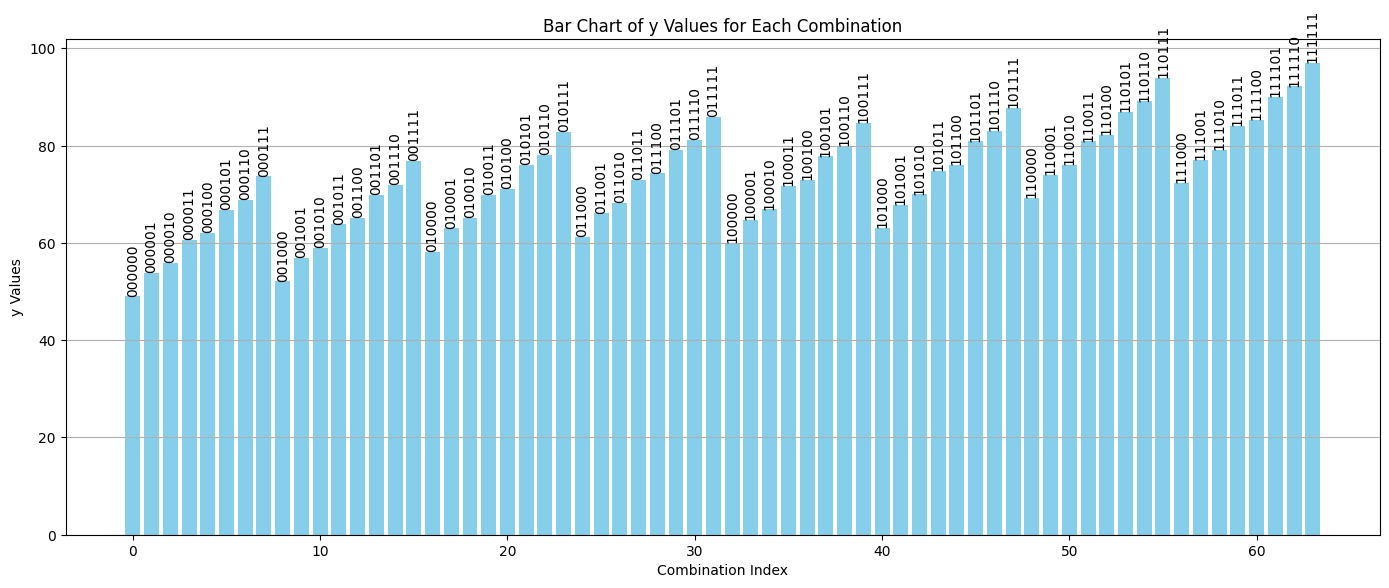

In [18]:
# Sort the DataFrame by concatenated variables
sorted_df = values_df.sort_values(by='Concatenated_Variables')

# Bar chart of y values for each combination with annotations
plt.figure(figsize=(14, 6))
bars = plt.bar(sorted_df.index, sorted_df['y_values'], color='skyblue')

# Annotate each bar with its concatenated variables
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.05, 
             sorted_df['Concatenated_Variables'].iloc[i], 
             ha='center', va='bottom', rotation=90)

plt.xlabel('Combination Index')
plt.ylabel('y Values')
plt.title('Bar Chart of y Values for Each Combination')
plt.grid(axis='y')
plt.tight_layout()
plt.show()